In [1]:
import numpy as np
import math

In [2]:
n= 3
np.random.seed(0)
alpha = 0.5
T= 1000
m = np.random.uniform(1, 2, n)
sig = np.random.uniform(0.5,1,n)
sig = 0.5*np.ones(n)
a = np.random.uniform(1,2,n)
b = np.random.uniform(0,.01, n)
c = np.random.uniform(0.0, 3.14*2, n)
def bandit(k):
    return np.random.normal(m[k], sig[k])
bandit(0)
def cosMew(k,t):
    return a[k]*math.cos(b[k]*t + c[k])

def cosBandit(k, t):
    mew = cosMew(k,t)#a[k]*math.cos(b[k]*t + c[k])
    return np.random.normal(mew, sig[k])
cosBandit(1,200)
#def cosMew(k,t):
#    return a[k]*math.cos(b[k]*t + c[k])
    
    
    

1.1256619551988454

In [3]:

np.random.seed(0)
total_reward = 0
for t in range(T):
    #random policy
    k = np.random.choice(range(n))
    reward = bandit(k)
    #print(k, reward)
    total_reward += reward
print(total_reward)

1624.3195519210383


In [4]:

np.random.seed(0)
total_reward = 0
for t in range(T):
    #random policy
    k = np.random.choice(range(n))
    reward = cosBandit(k,t)
    #print(k, reward)
    total_reward += reward
print(total_reward)

134.78729796860767


In [5]:
# epsilon greedy when it wieghts over entire history for constant average value
def epsilon_greedy(epsilon):
    weights = np.zeros(n)
    times = np.zeros(n)
    total_reward = 0
    rewards = np.zeros(T)

    for t in range(T):
        #random policy
        rand = np.random.random()
        if rand < epsilon:
            k = np.random.choice(range(n))
        else:
            k = np.argmax(weights)
        times[k] += 1
        reward = bandit(k)
        weights[k] += 1/times[k]*(reward-weights[k])
        #print(k, reward)
        total_reward += reward
        rewards[t] = total_reward/(t+1)
    return (total_reward, rewards)

#print(weights/times

In [6]:
# epsilon greedy when it weights past instances by how recent they are using alpha
def epsilon_greedy_cos(epsilon):
    graphs = []
    weights = np.zeros(n) 
    times = np.zeros(n)
    total_reward = 0
    rewards = np.zeros(T)
    
    

    for t in range(T):
        #random policy
        rand = np.random.random()
        if rand < epsilon:
            k = np.random.choice(range(n))
        else:
            k = np.argmax(weights)
        times[k] += 1
        reward = cosBandit(k,t)
        weights[k] += alpha*(reward-weights[k])
        #print(k, reward)
        total_reward += reward
        rewards[t] = total_reward/(t+1)
        graphs.append(weights.copy())
    return (total_reward, rewards, graphs)
(p3, p3r, graphs) = epsilon_greedy_cos(.1)
print(p3)
#print(weights/times

1027.7518489664897


In [7]:
# epsilon greedy if it remembers all past instances of every action
def epsilon_greedy_cos_remember(epsilon):
    weights = np.ones(n) * 6
    times = np.zeros(n)
    total_reward = 0
    rewards = np.zeros(T)

    for t in range(T):
        #random policy
        rand = np.random.random()
        if rand < epsilon:
            k = np.random.choice(range(n))
        else:
            k = np.argmax(weights)
        times[k] += 1
        reward = cosBandit(k,t)
        weights[k] += 1/times[k]*(reward-weights[k])
        #print(k, reward)
        total_reward += reward
        rewards[t] = total_reward/(t+1)
    return (total_reward, rewards)
(p4, p4r) = epsilon_greedy_cos_remember(.1)
print(p4)
#print(weights/times

467.3788221082584


In [8]:
# original version used in class when it remembers all past instances and averages them equally as well
def epsilon_greedy_old(epsilon):
    weights = np.zeros(n)
    times = np.zeros(n)
    total_reward = 0
    rewards = np.zeros(T)

    for t in range(T):
        #random policy
        rand = np.random.random()
        if rand < epsilon:
            k = np.random.choice(range(n))
        else:
            k = np.argmax(weights/times)
        times[k] += 1
        reward = bandit(k)
        weights[k] += reward
        #print(k, reward)
        total_reward += reward
        rewards[t] = total_reward/(t+1)
    return (total_reward, rewards)

#print(weights/times

In [9]:
np.random.seed(2)
(p1, p1r) = epsilon_greedy(0.1)
np.random.seed(2)
(p2, p2r) = epsilon_greedy_old(0.1)
(p3, p3r, graphs) = epsilon_greedy_cos(.1)

print(p1)
print(p2)
print(p3)

1670.2618269197278
1709.1892524858679
1060.9305770443068


/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


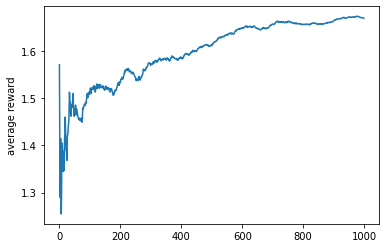

In [10]:
import matplotlib.pyplot as plt
plt.plot(p1r)
plt.ylabel('average reward')
plt.show()

1021.0881644532724
345.0848051352658


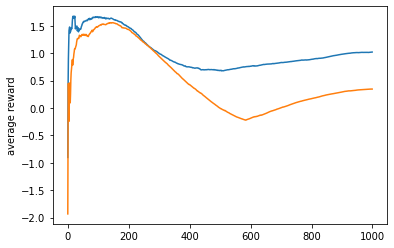

In [11]:
# Shows the difference in performance between when it remembers all past values and only recent values
alpha = .4
(p4, p4r) = epsilon_greedy_cos_remember(.1)
(p3, p3r, graphs) = epsilon_greedy_cos(.1)
print(p3)
print(p4)
plt.plot(p3r)
plt.plot(p4r)
plt.ylabel('average reward')
plt.show()


(3, 1000)


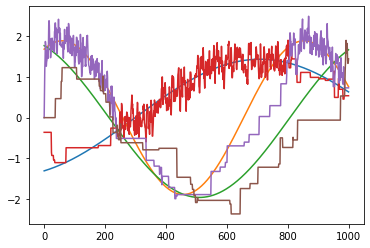

In [12]:
#shows the choices the algorithm made in the graph relative to the actual values of the actions.
for x in range(n):
    pl = np.zeros(T)
    for y in range(T):
        pl[y] = cosMew(x, y)
    plt.plot(pl)

graarr = np.array(graphs).T
print(np.shape(graarr))
for x in graarr:
    plt.plot(x)
plt.show()

In [13]:
#shows the average value of the epsilon-greedy algorithm with different epsilons 
average_per = np.zeros(11)
epsilon_tests = np.zeros(11)
tries = 20
for ep in range(0,11):
    tote1 = 0
    for x in range(tries):
        (e1, e2) = epsilon_greedy(ep/10)
        tote1 += e1/T
    average_per[ep] = tote1/tries
    epsilon_tests[ep] = ep/10
print(average_per)
    

[1.55755848 1.67730346 1.69025593 1.68610904 1.67281525 1.65856713
 1.64928863 1.64416808 1.63884054 1.62512273 1.62492789]


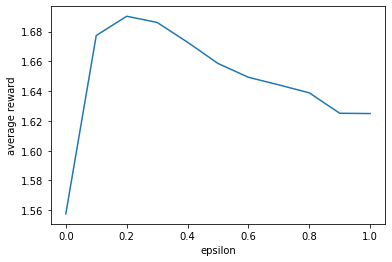

In [14]:
plt.plot(epsilon_tests,average_per)
plt.xlabel("epsilon")
plt.ylabel("average reward")
plt.show()